# Homework 14

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 999)

## Group 1: Some basic plotting

### 1. Make a map of power plants in the US, color coded by type.

In [2]:
bounds = [
            [
              -131.484375,
              20.96143961409684
            ],
            [
              -56.25,
              20.96143961409684
            ],
            [
              -56.25,
              51.6180165487737
            ],
            [
              -131.484375,
              51.6180165487737
            ],
            [
              -131.484375,
              20.96143961409684
            ]
]

states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
continental_box = Polygon(bounds)
continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_box)].to_crs({'init': 'epsg:5071'})
continental.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...


In [3]:
df = pd.read_csv('powerplants.csv')
points = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
powerplants = gpd.GeoDataFrame(df, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants = powerplants[powerplants.within(continental_box)].to_crs(continental.crs)

powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (796926.8336524522 1190764.260331179)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (759769.2812470195 913190.5319579486)


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

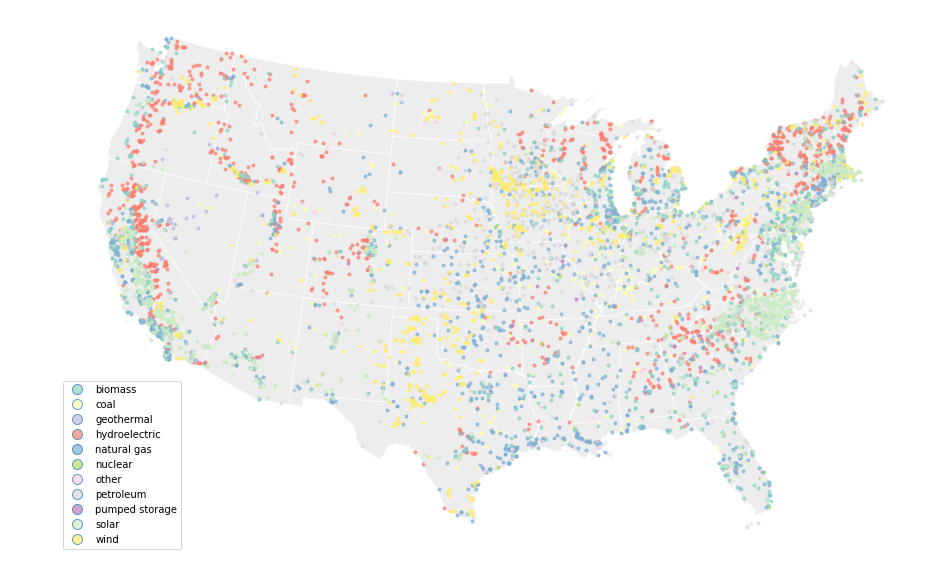

In [4]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#dddddd', edgecolor='#ffffff')
powerplants.plot(figsize=(20, 10), markersize=3, column='PrimSource', cmap='Set3', legend=True, alpha=0.7, ax=ax)
ax.axis('off')

### 3. Make a map of air quality stations, color coded by worst air quality ever.

In [5]:
df = pd.read_csv('pm25_annual_fixed.csv')
points = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
airquality = gpd.GeoDataFrame(df, geometry=points)
airquality.crs = {'init': 'epsg:4326'}
airquality = airquality[airquality.within(continental_box)].to_crs(continental.crs)

airquality.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (776937.6164835709 857822.2885195042)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (941707.5315372415 1185667.146516143)


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

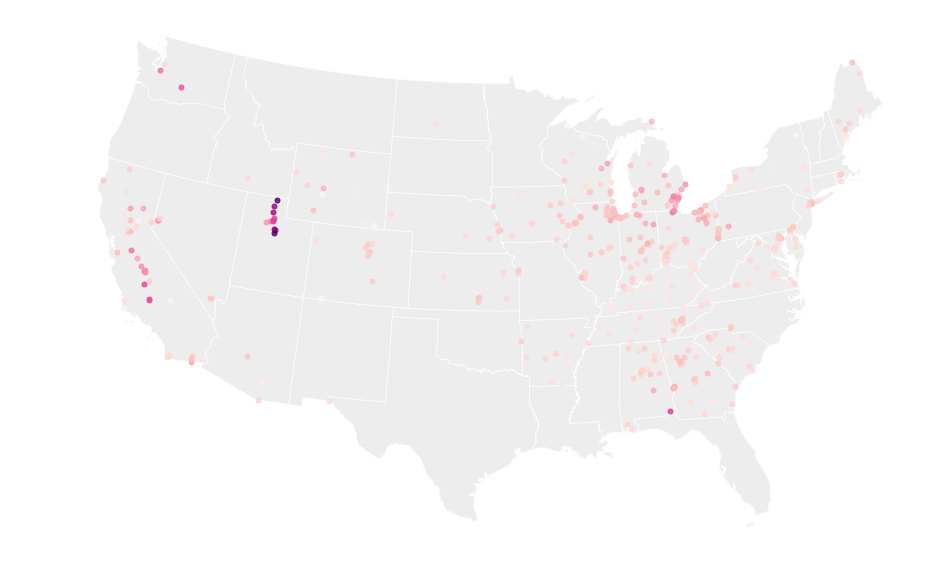

In [6]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#dddddd', edgecolor='#ffffff')
airquality.plot(figsize=(20, 10), markersize=5, column='1st Max Value', cmap='RdPu', alpha=0.8, ax=ax)
ax.axis('off')

### 5. Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [7]:
powerplants['color'] = 0
powerplants.loc[powerplants['PrimSource'] == 'nuclear', 'color'] = 1
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (796926.8336524522 1190764.260331179),0
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (759769.2812470195 913190.5319579486),0


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

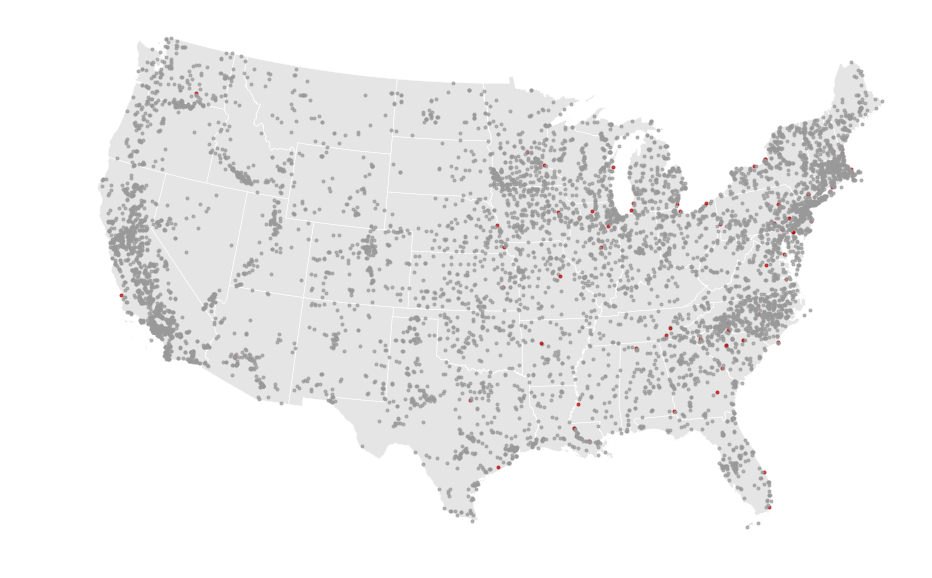

In [8]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#999999'), (1, '#B40404')])
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#cccccc', edgecolor='#ffffff')
powerplants.plot(figsize=(20, 10), markersize=3, column='color', cmap=cmap, alpha=0.7, ax=ax)
ax.axis('off')

## Group 2: For most of these you'll need a spatial join

### 2. Which power plants are in New York?

In [9]:
powerplants_with_states = gpd.sjoin(powerplants, continental, how='left', op='within')
powerplants_with_states.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (796926.8336524522 1190764.260331179),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (759769.2812470195 913190.5319579486),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [10]:
powerplants_with_states[powerplants_with_states['STUSPS'] == 'NY']

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,4.6,0.0,0.0,0.0,NaN,4.6,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 4.6 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.949000,-74.206300,POINT (1778509.130207101 2310035.976360777),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,3.2,0.0,0.0,0.0,NaN,3.2,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 3.2 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.828814,-74.131877,POINT (1787541.982035094 2298339.506578956),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,18.4,0.0,0.0,0.0,NaN,18.4,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 18.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,42.912600,-73.680500,POINT (1795565.8292625 2424766.143047533),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,9.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,43.312100,-75.109000,POINT (1672837.584526353 2442171.36152681),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,483.7,0.0,478.7,5.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 478.7 MW, Petroleum = 5 MW",Natural Gas Steam Turbine; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,41.571247,-73.974981,POINT (1806757.474462068 2273249.929613073),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1170,2481,Dashville,Central Hudson Gas & Elec Corp,3249,Electric Utility,Dashville,Ulster,12471,Route 213,hydroelectric,4.8,0.0,0.0,0.0,NaN,4.8,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 4.8 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.821700,-74.049700,POINT (1794321.84838391 2299113.269490744),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1171,2483,Neversink,New York Power Authority,15296,Electric Utility,Grahmsville,Sullivan,12740,7858 Route 42,hydroelectric,22.0,0.0,0.0,0.0,NaN,22.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 22 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.819400,-74.635800,POINT (1747289.835699054 2287941.427355375),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1172,2485,South Cairo,Central Hudson Gas & Elec Corp,3249,Electric Utility,Cairo,Greene,12413,Route 32,petroleum,21.3,0.0,0.0,21.3,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 21.3 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,42.291275,-73.986452,POINT (1787341.163340632 2351430.416453985),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1173,2486,Sturgeon,Central Hudson Gas & Elec Corp,3249,Electric Utility,Tillson,Ulster,12486,Coutant Road,hydroelectric,14.4,0.0,0.0,0.0,NaN,14.4,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 14.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.848191,-74.046678,POINT (1793885.861567151 2302055.507897361),0,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1174,2487,West Coxsackie,Central Hudson Gas &

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

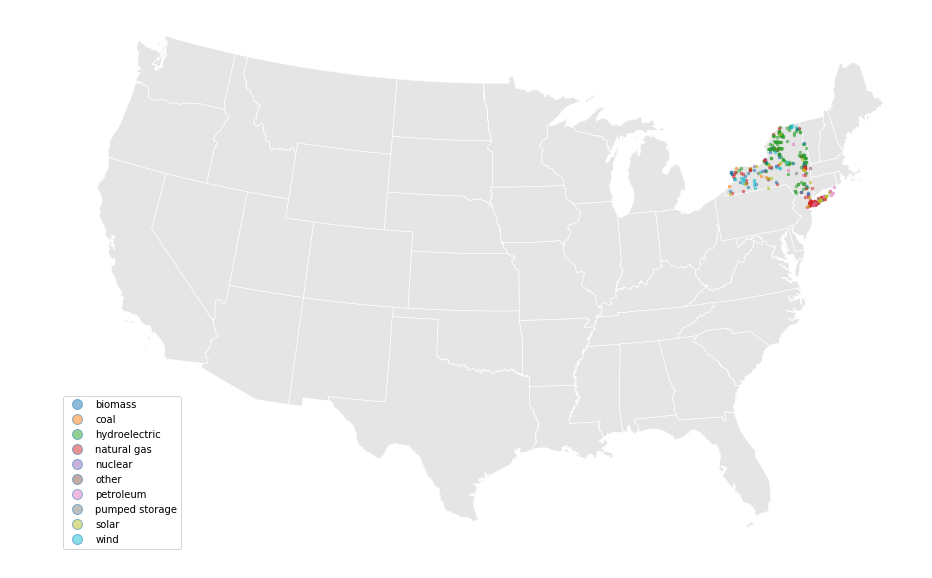

In [11]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#cccccc', edgecolor='#ffffff')
powerplants_with_states[powerplants_with_states['STUSPS'] == 'NY'].plot(figsize=(20, 10), markersize=2.5, column='PrimSource', cmap='tab10', legend=True, alpha=0.5, ax=ax)
ax.axis('off')

### 4. Which state produces the most energy from coal?

In [12]:
powerplants_with_states.groupby('NAME')['Coal_MW'].sum().sort_values(ascending=False).head()

NAME
Texas           23588.5
Indiana         16111.4
Ohio            15189.9
Illinois        14644.6
Pennsylvania    13313.4
Name: Coal_MW, dtype: float64

### 5. Map states with nuclear power plants in red, and states without in grey.

In [13]:
nuclear_states = powerplants_with_states.groupby('NAME')['Nuclear_MW'].sum().reset_index()
nuclear_states.head()

,NAME,Nuclear_MW
0,Alabama,5066.4
1,Arizona,3937.0
2,Arkansas,1808.5
3,California,2240.0
4,Colorado,0.0


In [14]:
states_with_nuclear = continental.merge(nuclear_states, how='left', on='NAME')
states_with_nuclear['color'] = 0
states_with_nuclear.loc[states_with_nuclear['Nuclear_MW'] > 0, 'color'] = 1
states_with_nuclear.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Nuclear_MW,color
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,5066.4,1
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,3937.0,1


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

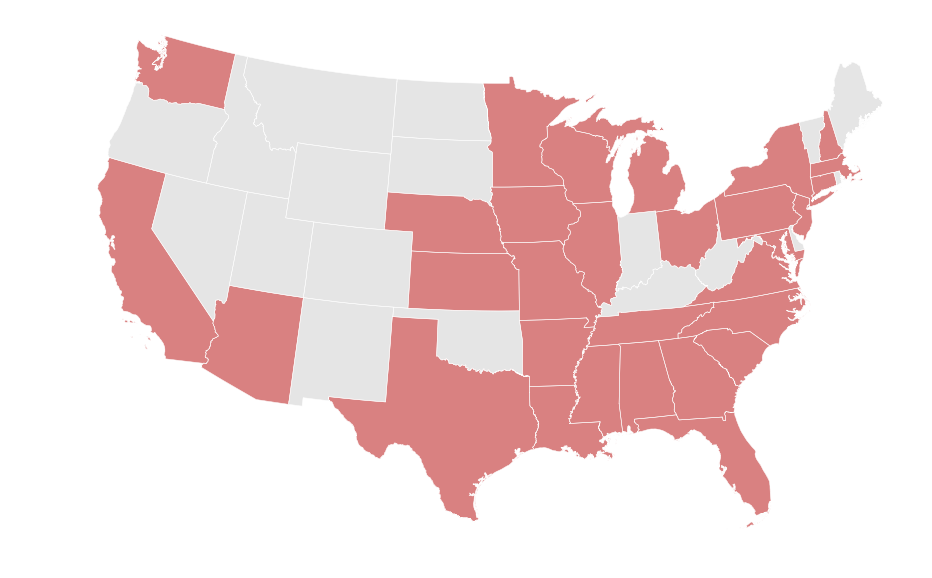

In [15]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#cccccc'), (1, '#B40404')])
ax = states_with_nuclear.plot(figsize=(20, 10), linewidth=0.5, column='color', cmap=cmap, edgecolor='#ffffff')
ax.axis('off')

### 8. Make a map of total wind energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [16]:
wind_states = powerplants_with_states.groupby('NAME')['Wind_MW'].sum().reset_index()
states_with_wind = continental.merge(wind_states, how='left', on='NAME')
states_with_wind.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Wind_MW
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,0.0
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,267.3


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

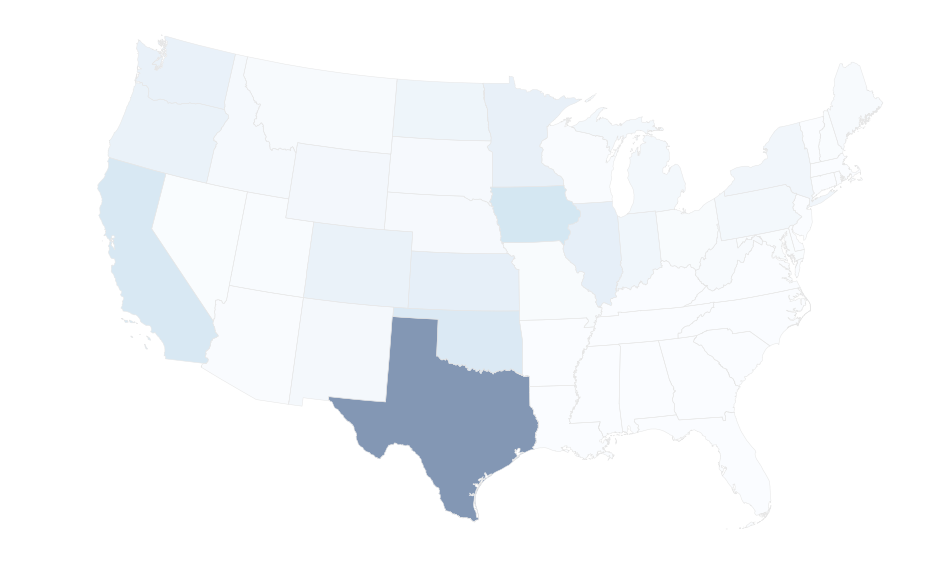

In [17]:
ax = states_with_wind.plot(figsize=(20, 10), linewidth=0.5, column='Wind_MW', cmap='Blues', edgecolor='#e6e6e6')
ax.axis('off')

### 10. Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red.

In [18]:
states_with_worst_air = continental.merge(airquality.groupby('State Name')['1st Max Value'].max().reset_index(), how='left', left_on='NAME', right_on='State Name')
states_with_worst_air.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,State Name,1st Max Value
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,Alabama,47.7
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,Arizona,21.5


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

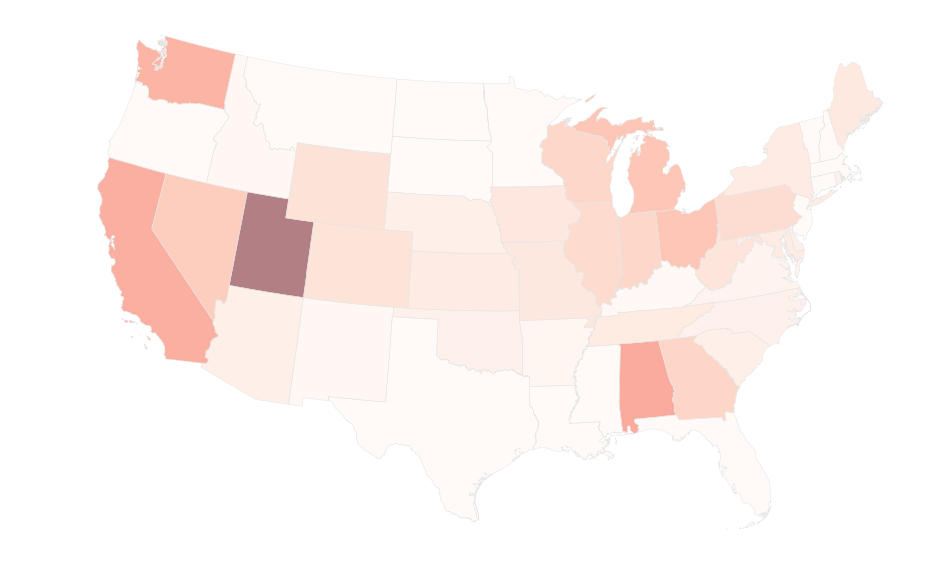

In [19]:
ax = states_with_worst_air.plot(figsize=(20, 10), linewidth=0.5, column='1st Max Value', cmap='Reds', edgecolor='#e6e6e6')
ax.axis('off')

### 13. Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

In [20]:
powerplants_with_states['renewable'] = False
powerplants_with_states.loc[powerplants_with_states['PrimSource'].isin(['solar', 'hydroelectric', 'wind', 'biomass', 'geothermal', 'pumped storage']), 'renewable'] = True
powerplants_with_states.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,renewable
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (796926.8336524522 1190764.260331179),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,True
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (759769.2812470195 913190.5319579486),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,False
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (905570.2654503169 1103206.900227695),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,True
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (917759.2648613909 1264879.229025812),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,False
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (809750.0440997988 1212771.116147024),0,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL,False


In [21]:
renewable = (powerplants_with_states.groupby('NAME')['renewable'].sum() / powerplants_with_states.groupby('NAME')['Plant_Code'].count() * 100).reset_index()
renewable.columns = ['NAME', 'renewable_percentage']
renewable.head()

,NAME,renewable_percentage
0,Alabama,50.000000
1,Arizona,66.371681
2,Arkansas,52.727273
3,California,74.140753
4,Colorado,67.320261


In [22]:
states_with_renewable = continental.merge(renewable, how='left', on='NAME')
states_with_renewable.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,renewable_percentage
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,50.000000
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,66.371681


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

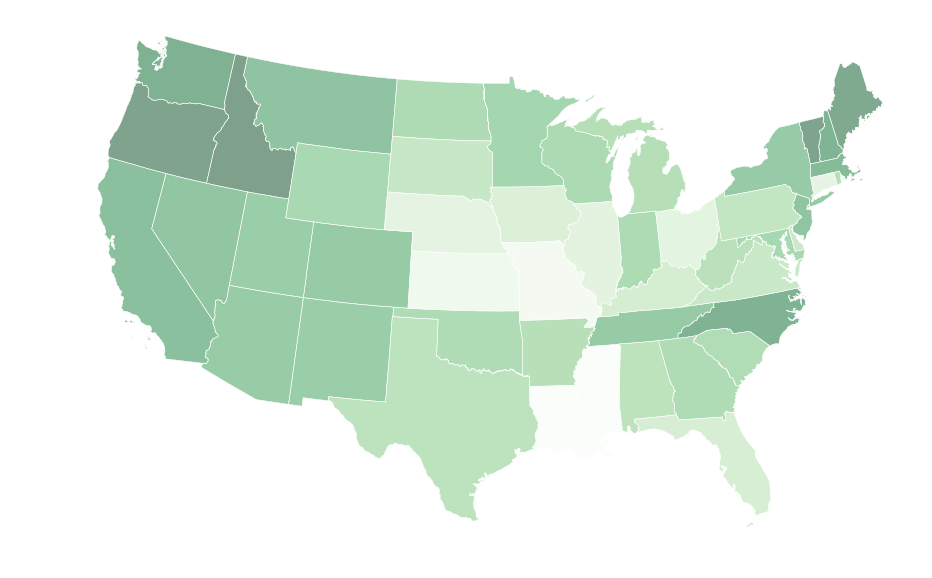

In [23]:
ax = states_with_renewable.plot(figsize=(20, 10), linewidth=0.5, column='renewable_percentage', cmap='Greens', edgecolor='#ffffff')
ax.axis('off')

## Group 3: Buffers, or more interesting/complicated analysis

### 2. Which power plants are within 75 miles of New York City?

In [24]:
nyc = gpd.GeoDataFrame(geometry=[Point(-74.0, 40.7)])
nyc.crs = {'init': 'epsg:4326'}
nyc = nyc.to_crs(continental.crs)

nyc_buffer = nyc.buffer(120701)

powerplants_near_nyc = powerplants[powerplants.within(nyc_buffer.loc[0])]

powerplants_near_nyc

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color
341,539,Rocky River (CT),FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,200 Kent Road,pumped storage,29.4,0.0,0.0,0.0,NaN,0.0,29.4,0.0,0.0,0.0,NaN,NaN,Pumped Storage = 29.4 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,41.582600,-73.434900,POINT (1849937.061683165 2284876.360576653),0
342,540,Branford,Connecticut Jet Power LLC,22379,IPP Non-CHP,Branford,New Haven,6450,Route 1,petroleum,17.4,0.0,0.0,17.4,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 17.4 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.292500,-72.794200,POINT (1909280.145587145 2266014.413640415),0
343,541,Bulls Bridge,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,781 Kent Road,hydroelectric,8.4,0.0,0.0,0.0,NaN,8.4,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 8.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.659046,-73.491984,POINT (1843337.824366606 2292082.725726847),0
344,542,Cos Cob,Connecticut Jet Power LLC,22379,IPP Non-CHP,Greenwich,Fairfield,6430,Sound Shore Drive,petroleum,95.6,0.0,0.0,95.6,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 95.6 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.028900,-73.598900,POINT (1851218.51013529 2221426.212879802),0
345,544,Devon Station,Devon Power LLC,22350,IPP Non-CHP,Milford,New Haven,6460,734 Naugatuck Avenue,petroleum,132.5,0.0,0.0,132.5,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 132.5 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.209797,-73.108976,POINT (1886096.663335207 2250741.132285696),0
350,552,Shepaug,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,Southbury,New Haven,6488,2225 River Road,hydroelectric,41.5,0.0,0.0,0.0,NaN,41.5,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 41.5 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.448420,-73.295321,POINT (1864716.062825096 2273010.637495853),0
351,553,Stevenson,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,Monroe,Fairfield,6468,1 Roosevelt Drive,hydroelectric,28.9,0.0,0.0,0.0,NaN,28.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 28.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.383300,-73.171400,POINT (1876431.777262387 2268368.952279679),0
362,568,Bridgeport Station,PSEG Power Connecticut LLC,15452,IPP Non-CHP,Bridgeport,Fairfield,6604,1 Atlantic Street,coal,400.3,383.4,0.0,16.9,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 383.4 MW, Petroleum = 16.9 MW",Conventional Steam Coal; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,41.170600,-73.184400,POINT (1881045.656298239 2244984.166881919),0
1147,2388,Oyster Creek,Exelon Nuclear,55951,IPP Non-CHP,Forked River,Ocean,8731,PO Box 388,nuclear,607.7,0.0,0.0,0.0,NaN,0.0,0.0,607.7,0.0,0.0,NaN,NaN,Nuclear = 607.7 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,39.814300,-74.206200,POINT (1832855.996885886 2077258.413622385),1
1148,2390,Sayreville,NRG REMA LLC,17235,IPP Non-CHP,Sayerville,Middlesex,8872,River Road,natural gas,200.0,0.0,150.0,50.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 150 MW, Petroleum = 50 MW",Natural Gas Fired Combustion Turbine; Petroleu...,"EIA-860, EIA-860M and EIA-923",201607,40.476525,-74.352336,POINT (1804025.08186149 2146726.779682845),0


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

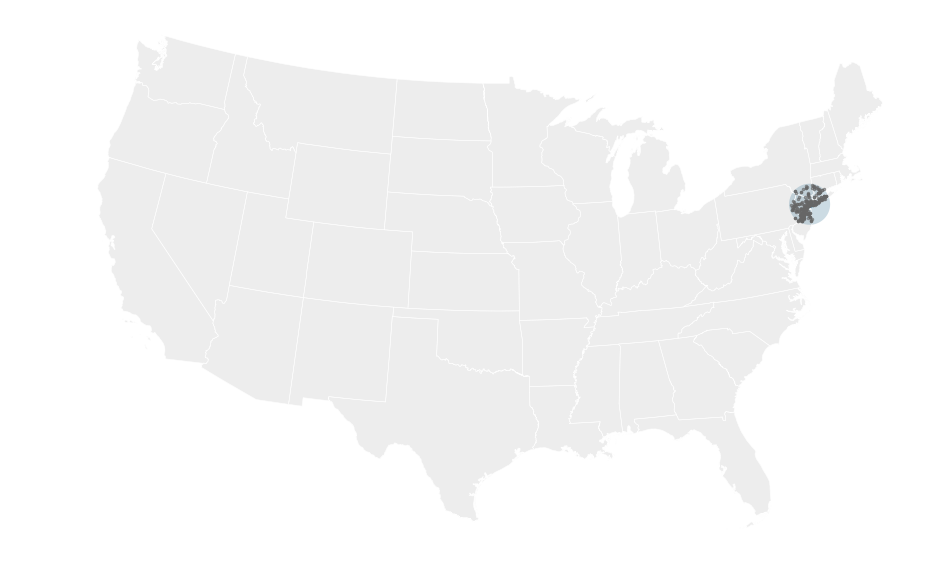

In [25]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#dddddd', edgecolor='#ffffff')
nyc.plot(markersize=6, color='#578aa5', alpha=0.8, ax=ax)
nyc_buffer.plot(color='#578aa5', alpha=0.3, linewidth=0, ax=ax)
powerplants_near_nyc.plot(markersize=2.5, color='#666666', alpha=0.6, ax=ax)
ax.axis('off')

### 4. What is the most popular power source by state?

In [26]:
grouping = powerplants_with_states.groupby(['NAME', 'PrimSource'])['Total_MW'].sum().groupby(level=0, group_keys=False).nlargest(1).reset_index()
grouping.head()

,NAME,PrimSource,Total_MW
0,Alabama,natural gas,11386.0
1,Arizona,natural gas,13412.7
2,Arkansas,natural gas,6145.2
3,California,natural gas,42443.5
4,Colorado,natural gas,6628.2


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

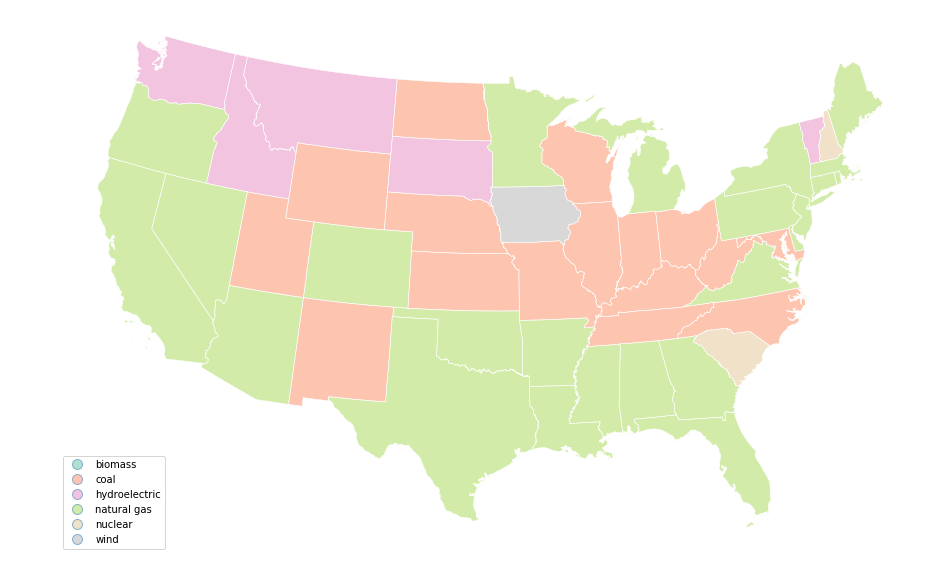

In [27]:
states_with_primsource = continental.merge(grouping, how='left', on='NAME')
ax = states_with_primsource.plot(figsize=(20, 10), linewidth=0.5, column='PrimSource', cmap='Set2', legend=True, edgecolor='#ffffff')
ax.axis('off')

### 5. Get the average (or highest/worst) PM2.5 within XXX miles of each power plant (you pick the distance). Is coal dirtier than other kinds of plants?

In [28]:
powerplants_buffer = gpd.GeoDataFrame(geometry=powerplants.buffer(5000))

powerplants_buffer['pm25'] = powerplants_buffer.apply(lambda row: airquality[airquality.within(row['geometry'])]['Arithmetic Mean'].mean(), axis=1)
powerplants_buffer = powerplants_buffer.drop('geometry', axis=1)

powerplants_with_pm25 = powerplants.merge(powerplants_buffer, how='left', left_index=True, right_index=True)
powerplants_with_pm25 = powerplants_with_pm25[powerplants_with_pm25['pm25'].notnull()]
powerplants_with_pm25.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color,pm25
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (917759.2648613909 1264879.229025812),0,9.073333
67,124,Demoss Petrie,Tucson Electric Power Co,24211,Electric Utility,Tucson,Pima,85705,2501 N Flowing Wells Road,natural gas,75.0,0.0,75.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 75 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,32.252273,-110.992148,POINT (-1399640.781945661 1130526.661589347),0,4.858621


In [29]:
# BUT: not so many cases!!!

powerplants_with_pm25.shape

(340, 31)

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

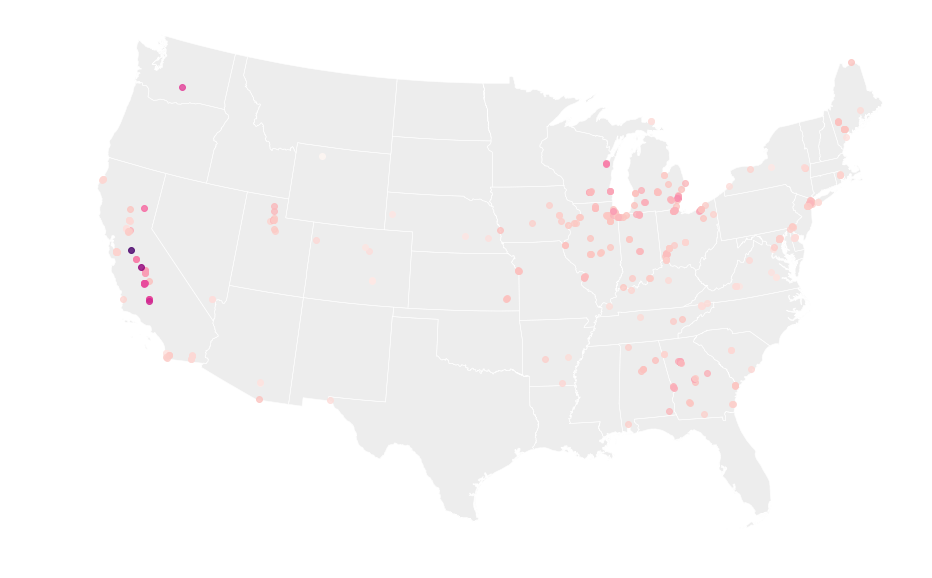

In [30]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#dddddd', edgecolor='#ffffff')
powerplants_with_pm25.plot(figsize=(20, 10), markersize=6, column='pm25', cmap='RdPu', alpha=0.8, ax=ax)
ax.axis('off')

In [31]:
powerplants_with_pm25.groupby('PrimSource')['pm25'].mean().sort_values(ascending=False)

PrimSource
solar            10.210585
other             8.939745
petroleum         8.786227
coal              8.755715
biomass           8.562574
natural gas       8.458570
hydroelectric     8.242369
wind              7.763807
geothermal        6.846667
Name: pm25, dtype: float64

### 6. Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

In [32]:
nyc_buffer_new = nyc.buffer(241402)
powerplants_near_nyc_new = powerplants[powerplants.within(nyc_buffer_new.loc[0])]

powerplants_near_nyc_new.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,color
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,4.6,0.0,0.0,0.0,NaN,4.6,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 4.6 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.9490,-74.2063,POINT (1778509.130207101 2310035.976360777),0
341,539,Rocky River (CT),FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,200 Kent Road,pumped storage,29.4,0.0,0.0,0.0,NaN,0.0,29.4,0.0,0.0,0.0,NaN,NaN,Pumped Storage = 29.4 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,41.5826,-73.4349,POINT (1849937.061683165 2284876.360576653),0


(2500000, 1850000)

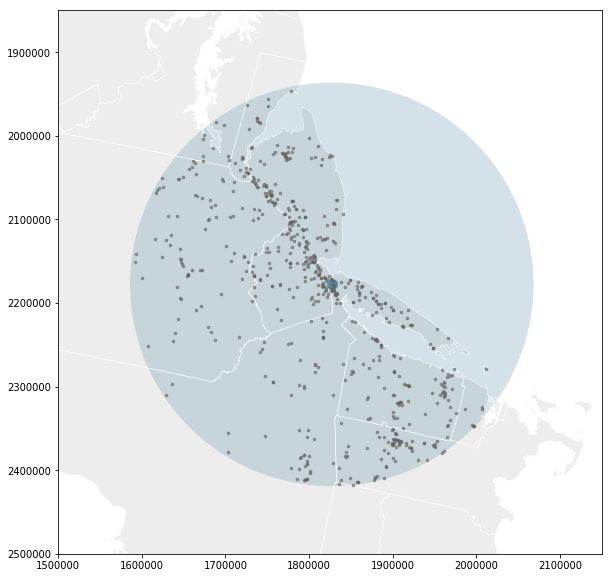

In [33]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='#dddddd', edgecolor='#ffffff')
nyc.plot(markersize=10, color='#578aa5', alpha=1, ax=ax)
nyc_buffer_new.plot(color='#578aa5', alpha=0.25, linewidth=0, ax=ax)
powerplants_near_nyc_new.plot(markersize=2.5, color='#666666', alpha=0.6, ax=ax)
#ax.axis('off')
ax.set_xlim([1500000, 2150000])
ax.set_ylim([2500000, 1850000])